installing the libaries 

In [ ]:
!pip install osmnx 
!pip install missingno

In [ ]:
import osmnx as ox 
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd
import warnings
import missingno as mano
import seaborn as sns
from matplotlib import pyplot
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.set_option('display.max_columns',30)

##loading data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load data created from the dataset preparation notebook
data = pd.read_csv('/content/gdrive/MyDrive/AIA STUDIO/RESULTS/final dataset/150622realfinal.csv', delimiter= ",")
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Cleaning the dataset 

In [ ]:
data

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,amenities,buildings,trees,benches,fountain,drinking water,art pts,short term parking,parking_places,waterinfluence,grassinfluence,Street materials,UHI,DIRhori,GLO_hori_d,GLO_hori_real,SSD_sum
0,199732,2447309494,0,29065909,False,3,Universitätsring,secondary,50,11.008,"LINESTRING (16.3601365 48.2086619, 16.3601647 ...",0,0,1,0,0,0,0,0,0.0,0.267570,0.883517,asphalt,0.405181,4.023,6.974,6.963,13.0
1,199732,318697385,0,25535788,False,3,Rathausplatz,tertiary,50,20.372,"LINESTRING (16.3601365 48.2086619, 16.3600511 ...",0,0,1,0,0,0,0,0,0.0,0.160478,0.863910,asphalt,0.405181,4.023,6.974,6.963,13.0
2,199732,2447277599,0,537176980,False,3,Dr.-Karl-Renner-Ring,secondary,50,22.643,"LINESTRING (16.3601365 48.2086619, 16.3601148 ...",0,0,1,0,0,0,0,0,0.0,0.127268,1.009087,asphalt,0.405181,4.023,6.974,6.963,13.0
3,2447309494,3653696701,0,29065909,False,3,Universitätsring,secondary,50,13.511,"LINESTRING (16.3601647 48.2087591, 16.3601993 ...",0,0,3,0,0,0,0,0,0.0,0.447723,0.739094,asphalt,0.405181,4.023,6.974,6.963,13.0
4,2447309494,199732,0,29065909,False,3,Universitätsring,secondary,50,11.008,"LINESTRING (16.3601647 48.2087591, 16.3601365 ...",0,0,1,0,0,0,0,0,0.0,0.267570,0.883517,asphalt,0.405181,4.023,6.974,6.963,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298929,9817093021,9816987805,0,1069575181,False,NaN,NaN,footway,NaN,35.565,"LINESTRING (16.3056406 48.2174324, 16.3056349 ...",0,1,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298930,9817093055,9817093055,0,"[1069575184, 1069575186, 1069575191]",False,NaN,NaN,service,NaN,100.214,"LINESTRING (16.306412 48.2175815, 16.3063597 4...",0,0,6,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298931,9817093055,9817093055,1,"[1069575184, 1069575186, 1069575191]",False,NaN,NaN,service,NaN,100.214,"LINESTRING (16.306412 48.2175815, 16.3063863 4...",0,0,6,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298932,9817093055,9817093049,0,"[1069575185, 1069575188, 1069575190]",False,NaN,NaN,service,NaN,29.206,"LINESTRING (16.306412 48.2175815, 16.3064603 4...",0,0,3,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

u                       int64
v                       int64
key                     int64
osmid                  object
oneway                   bool
lanes                  object
name                   object
highway                object
maxspeed               object
length                float64
geometry               object
amenities               int64
buildings               int64
trees                   int64
benches                 int64
fountain                int64
drinking water          int64
art pts                 int64
short term parking      int64
parking_places        float64
waterinfluence        float64
grassinfluence        float64
Street materials       object
UHI                   float64
DIRhori               float64
GLO_hori_d            float64
GLO_hori_real         float64
SSD_sum               float64
dtype: object

In [ ]:
df=data.copy()

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.isna().sum()

u                          0
v                          0
key                        0
osmid                      0
oneway                     0
lanes                 272008
name                  198242
highway                    0
maxspeed              209040
length                     0
geometry                   0
amenities                  0
buildings                  0
trees                      0
benches                    0
fountain                   0
drinking water             0
art pts                    0
short term parking         0
parking_places             0
waterinfluence        233168
grassinfluence        133508
Street materials       92288
UHI                     1064
DIRhori                 1594
GLO_hori_d              1594
GLO_hori_real           1594
SSD_sum                 1594
dtype: int64

In [ ]:
#fill the NAN values
df['waterinfluence'] = df['waterinfluence'].fillna(0)
df['grassinfluence'] = df['grassinfluence'].fillna(0)
df['Street materials'] = df['Street materials'].fillna('no pavement')
df = df.replace(np.nan, 0)

In [ ]:
df.describe()

,u,v,key,length,amenities,buildings,trees,benches,fountain,drinking water,art pts,short term parking,parking_places,waterinfluence,grassinfluence,UHI,DIRhori,GLO_hori_d,GLO_hori_real,SSD_sum
count,2.989340e+05,2.989340e+05,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000,298934.000000
mean,3.140077e+09,3.140077e+09,0.013618,50.265918,0.105294,4.598915,4.117263,0.149016,0.002823,0.018004,0.044813,0.015930,0.029953,0.273000,0.528033,0.550915,4.113138,6.886880,6.887524,12.966623
std,2.720664e+09,2.720664e+09,0.124312,71.580598,0.490150,11.553991,10.577928,0.862573,0.065170,0.139498,0.250991,0.159219,0.634242,0.875930,0.813877,0.147823,0.456776,0.508829,0.515468,0.977545
min,1.997320e+05,1.997320e+05,0.000000,0.134000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.988443e+08,4.988443e+08,0.000000,11.935250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.449831,3.895000,6.878000,6.872000,13.000000
50%,2.501975e+09,2.501975e+09,0.000000,28.180000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102897,0.518099,4.084000,6.925000,6.924000,13.000000
75%,4.754137e+09,4.754137e+09,0.000000,62.705000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.841397,0.684449,4.336000,6.967000,6.970000,13.300000
max,9.817627e+09,9.817627e+09,4.000000,2186.559000,19.000000,267.000000,441.000000,41.000000,6.000000,3.000000,10.000000,6.000000,51.000000,16.282604,11.397120,0.901656,5.741000,7.224000,7.641000,13.500000


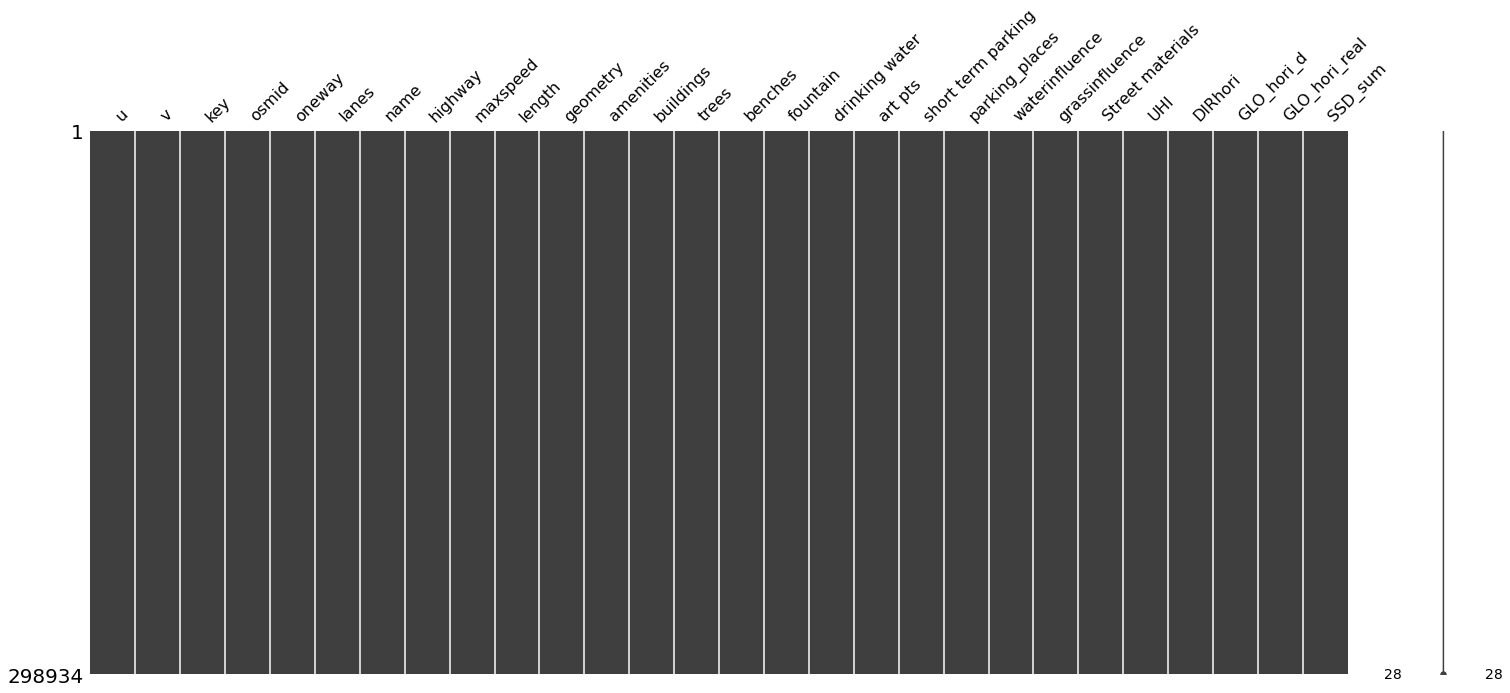

In [ ]:
mano.matrix(df)

## calculating indicies and working with the data

In [ ]:
#drop features not needed for clustering
df.drop( ["u", "v", "osmid","geometry","key", "name",  ] ,inplace=True, axis=1)

In [ ]:
df

,oneway,lanes,highway,maxspeed,length,amenities,buildings,trees,benches,fountain,drinking water,art pts,short term parking,parking_places,waterinfluence,grassinfluence,Street materials,UHI,DIRhori,GLO_hori_d,GLO_hori_real,SSD_sum
0,False,3,secondary,50,11.008,0,0,1,0,0,0,0,0,0.0,0.267570,0.883517,asphalt,0.405181,4.023,6.974,6.963,13.0
1,False,3,tertiary,50,20.372,0,0,1,0,0,0,0,0,0.0,0.160478,0.863910,asphalt,0.405181,4.023,6.974,6.963,13.0
2,False,3,secondary,50,22.643,0,0,1,0,0,0,0,0,0.0,0.127268,1.009087,asphalt,0.405181,4.023,6.974,6.963,13.0
3,False,3,secondary,50,13.511,0,0,3,0,0,0,0,0,0.0,0.447723,0.739094,asphalt,0.405181,4.023,6.974,6.963,13.0
4,False,3,secondary,50,11.008,0,0,1,0,0,0,0,0,0.0,0.267570,0.883517,asphalt,0.405181,4.023,6.974,6.963,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298929,False,0,footway,0,35.565,0,1,0,0,0,0,0,0,0.0,0.000000,0.000000,no pavement,0.000000,0.000,0.000,0.000,0.0
298930,False,0,service,0,100.214,0,0,6,0,0,0,0,0,0.0,0.000000,0.000000,no pavement,0.000000,0.000,0.000,0.000,0.0
298931,False,0,service,0,100.214,0,0,6,0,0,0,0,0,0.0,0.000000,0.000000,no pavement,0.000000,0.000,0.000,0.000,0.0
298932,False,0,service,0,29.206,0,0,3,0,0,0,0,0,0.0,0.000000,0.000000,no pavement,0.000000,0.000,0.000,0.000,0.0


subdivide features with street length to get a better representation

In [ ]:
df['amenities index'] = df.apply(lambda row: row.amenities/row.length, axis=1)

In [ ]:
df['buildings index'] = df.apply(lambda row: row.buildings/row.length, axis=1)

In [ ]:
df['tree index'] = df.apply(lambda row: row.trees/row.length, axis=1)

In [ ]:
df['benches index'] = df.apply(lambda row: row['benches']/row.length, axis =1)

In [ ]:
df['fountain index'] = df.apply(lambda row: row.fountain/row.length, axis=1)

In [ ]:
df['art pts index'] = df.apply(lambda row: row["art pts"]/row.length, axis=1)

In [ ]:
df['parking index'] = df.apply(lambda row: row['parking_places']/row.length, axis =1)

In [ ]:
df

,oneway,lanes,highway,maxspeed,length,amenities,buildings,trees,benches,fountain,drinking water,art pts,short term parking,parking_places,waterinfluence,grassinfluence,Street materials,UHI,DIRhori,GLO_hori_d,GLO_hori_real,SSD_sum,amenities index,buildings index,tree index,benches index,fountain index,art pts index,parking index
0,False,3,secondary,50,11.008,0,0,1,0,0,0,0,0,0.0,0.267570,0.883517,asphalt,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.090843,0.0,0.0,0.0,0.0
1,False,3,tertiary,50,20.372,0,0,1,0,0,0,0,0,0.0,0.160478,0.863910,asphalt,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.049087,0.0,0.0,0.0,0.0
2,False,3,secondary,50,22.643,0,0,1,0,0,0,0,0,0.0,0.127268,1.009087,asphalt,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.044164,0.0,0.0,0.0,0.0
3,False,3,secondary,50,13.511,0,0,3,0,0,0,0,0,0.0,0.447723,0.739094,asphalt,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.222041,0.0,0.0,0.0,0.0
4,False,3,secondary,50,11.008,0,0,1,0,0,0,0,0,0.0,0.267570,0.883517,asphalt,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.090843,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298929,False,0,footway,0,35.565,0,1,0,0,0,0,0,0,0.0,0.000000,0.000000,no pavement,0.000000,0.000,0.000,0.000,0.0,0.0,0.028118,0.000000,0.0,0.0,0.0,0.0
298930,False,0,service,0,100.214,0,0,6,0,0,0,0,0,0.0,0.000000,0.000000,no pavement,0.000000,0.000,0.000,0.000,0.0,0.0,0.000000,0.059872,0.0,0.0,0.0,0.0
298931,False,0,service,0,100.214,0,0,6,0,0,0,0,0,0.0,0.000000,0.000000,no pavement,0.000000,0.000,0.000,0.000,0.0,0.0,0.000000,0.059872,0.0,0.0,0.0,0.0
298932,False,0,service,0,29.206,0,0,3,0,0,0,0,0,0.0,0.000000,0.000000,no pavement,0.000000,0.000,0.000,0.000,0.0,0.0,0.000000,0.102719,0.0,0.0,0.0,0.0


In [ ]:
#keep only the created indicies and categorical values in the dataframe
df_index = df
df_index.drop( ["amenities", "buildings", "trees","benches","fountain", "art pts","parking_places" ] ,inplace=True, axis=1)

In [ ]:
df['Street materials'].unique()
# we see that we have 5 street material types

array(['asphalt', 'paving', 'no pavement', 'gravel', 'ground'],
      dtype=object)

In [ ]:
#replace multiple values of highway with the most important one
df_index['highway'] = df_index['highway'].replace(["['footway', 'steps']", "['footway', 'path', 'steps']", "['footway', 'service', 'path']",  
                                                   "['footway', 'living_street']","['footway', 'living_street', 'steps']", "['footway', 'corridor']", "['footway', 'pedestrian', 'residential']",
                                                   "['footway', 'primary']", "['footway', 'unclassified']", "['footway', 'track', 'steps']","['footway', 'track', 'path']",
                                                   "['footway', 'path', 'service']","['footway', 'pedestrian', 'steps']",
                                                   "['footway', 'service', 'path', 'steps']","['footway', 'path', 'service', 'steps']",
                                                   "['footway', 'corridor', 'service']", "['footway', 'corridor', 'steps']", "['footway', 'path']",
                                                   "['footway', 'service']","['footway', 'path', 'residential']", "['footway', 'pedestrian']",
                                                   "['footway', 'service', 'steps']","['footway', 'steps', 'path', 'residential']",
                                                   "['footway', 'track']", "['steps', 'footway']", "['path', 'footway']", "['service', 'footway']",
                                                   "['service', 'steps', 'footway']", "['steps', 'path', 'footway']", "['service', 'path', 'footway']","['living_street', 'footway']", "['living_street', 'steps', 'footway']",
                                                   "['corridor', 'footway']", "['primary', 'footway']", "['unclassified', 'footway']", "['steps', 'footway', 'track']", "['path', 'footway', 'track']",
                                                   "['service', 'steps', 'path', 'footway']", "['steps', 'service', 'path', 'footway']", "['corridor', 'service', 'footway']", "['corridor', 'steps', 'footway']",
                                                   "['footway', 'path', 'residential', 'steps']", "['footway', 'steps', 'service']", "['footway', 'residential', 'steps']",
                                                   "['footway', 'pedestrian', 'residential', 'steps']", "['footway', 'residential', 'service']", "['footway', 'path', 'track']", "['footway', 'steps', 'path', 'service']"
                                                   ],'footway')


df_index['highway'] = df_index['highway'].replace(["['service', 'residential']", "['secondary', 'residential']", "['footway', 'steps', 'residential']", "['unclassified', 'residential']",
                                                   "['residential', 'footway', 'pedestrian', 'steps']","['footway', 'pedestrian', 'steps', 'residential']", "['footway', 'service', 'residential']",
                                                   "['trunk_link', 'residential']", "['footway', 'track', 'residential']", "['path', 'service', 'residential']","['track', 'living_street', 'residential']",
                                                   "['living_street', 'track', 'residential']","['steps', 'path', 'residential']",
                                                   "['residential', 'path', 'steps']","['service', 'path', 'residential']", "['steps', 'track', 'residential']",
                                                    "['residential', 'track', 'steps']", "['residential', 'footway', 'path', 'steps']",
                                                   "['pedestrian', 'steps', 'residential']","['residential', 'pedestrian', 'steps']",
                                                   "['residential', 'service', 'steps']",'living_street',"['footway', 'residential']","['path', 'residential']",
                                                   "['primary', 'residential']","['living_street', 'residential']","['steps', 'service', 'residential']",
                                                   "['track', 'residential']","['pedestrian', 'residential']", "['residential', 'footway', 'steps']",
                                                   "['steps', 'residential']", "['residential', 'steps']","['tertiary', 'residential']", "['track', 'path', 'residential']","['residential', 'path']",
                                                   "['residential', 'footway']","['residential', 'service']", "['residential', 'path', 'footway']","['residential', 'steps', 'path', 'footway']",
                                                   "['residential', 'steps', 'service']","['residential', 'track']","['residential', 'steps', 'footway']", "['residential', 'path', 'track']","['residential', 'secondary']",
                                                   "['pedestrian', 'residential', 'steps', 'footway']", "['residential', 'service', 'footway']", "['pedestrian', 'residential', 'footway']", "['residential', 'footway', 'track']",
                                                   "['living_street', 'residential', 'track']", "['residential', 'steps', 'path']", "['residential', 'path', 'service']",
                                                   "['residential', 'steps', 'track']", "['steps', 'residential', 'path', 'footway']", "['steps', 'residential', 'path']","['pedestrian', 'residential', 'steps']",
                                                   "['service', 'steps', 'residential']", "['steps', 'residential', 'service']", "['path', 'track', 'residential']", "['path', 'residential', 'steps']",
                                                   "['path', 'residential', 'steps']", "['track', 'residential', 'steps']", "['service', 'residential', 'steps']","['path', 'residential', 'service']"

                                                   ],'residential')


df_index['highway'] = df_index['highway'].replace(['primary_link', "['tertiary', 'primary']", "['primary', 'service']", "['primary', 'secondary']", "['primary', 'unclassified']",
                                                   "['unclassified', 'primary']", "['trunk', 'primary']", "['primary', 'primary_link']", "['primary', 'tertiary']",
                                                   ],'primary')

df_index['highway'] = df_index['highway'].replace(['secondary_link', "['tertiary_link', 'secondary']", "['secondary', 'service']","['tertiary', 'secondary']", 
                                                   "['secondary_link', 'secondary']", "['unclassified', 'secondary']","['tertiary', 'secondary']",
                                                   "['secondary', 'secondary_link']", "['service', 'secondary']", "['secondary', 'tertiary_link']"],'secondary')

df_index['highway'] = df_index['highway'].replace(['trunk_link', "['trunk', 'trunk_link']", "['primary', 'trunk']"],'trunk')

df_index['highway'] = df_index['highway'].replace(["['track', 'service']", "['track', 'living_street']","['track', 'steps']", "['living_street', 'track']","['corridor', 'track']",
                                                   "['service', 'track']","['path', 'track']", "['steps', 'track']", "['unclassified', 'service', 'track']",
                                                   "['service', 'path', 'track']", "['track', 'corridor']"],'track')

df_index['highway'] = df_index['highway'].replace(["['path', 'steps']", "['service', 'path']", "['living_street', 'path']", "['path', 'service']","['track', 'path']",
                                                   'road','bridleway',"['track', 'path', 'service']", "['path', 'steps', 'service']"],'path')


df_index['highway'] = df_index['highway'].replace(['tertiary_link', "['tertiary', 'service']", "['tertiary_link', 'service']", "['tertiary', 'primary_link']", "['tertiary', 'unclassified']",
                                                   ],'tertiary')


df_index['highway'] = df_index['highway'].replace(["['pedestrian', 'service']", "['living_street', 'service']", "['unclassified', 'service']", "['unclassified', 'track', 'service']",
                                                   "['path', 'track', 'service']", "['service', 'track', 'path']", "['corridor', 'elevator']","['service', 'path', 'steps']",
                                                   "['path', 'service', 'steps']",'elevator', 'corridor',"['service', 'steps']", "['steps', 'service', 'path']", "['service', 'steps', 'path']",
                                                   "['elevator', 'corridor']", "['steps', 'service']"],'service')

df_index['highway'] = df_index['highway'].replace(["['pedestrian', 'corridor']", "['pedestrian', 'steps']", "['pedestrian', 'living_street']", "['living_street', 'pedestrian']", "['pedestrian', 'footway']","['pedestrian', 'steps', 'footway']",
                                                   
                                                   ],'pedestrian')

df_index['highway'] = df_index['highway'].replace(["['primary', 'steps']", "['corridor', 'steps']", "['steps', 'path']"],'steps')





##encoding of categorical values

In [ ]:
#encode categorical values as numbers
df_index['Street materials'] = df_index['Street materials'].replace('asphalt',1)
df_index['Street materials'] = df_index['Street materials'].replace('paving',2)
df_index['Street materials'] = df_index['Street materials'].replace('gravel',3)
df_index['Street materials'] = df_index['Street materials'].replace(['ground','no pavement'],4)

In [ ]:
df['Street materials'].unique()

array([1, 2, 4, 3])

In [ ]:
df_index['highway'].unique()

array(['secondary', 'tertiary', 'footway', 'service', 'residential',
       'pedestrian', 'path', 'primary', 'steps', 'trunk', 'track',
       'unclassified'], dtype=object)

In [ ]:
#encode categorical values as numbers
df_index['highway'] = df_index['highway'].replace('unclassified',0)
df_index['highway'] = df_index['highway'].replace(['primary','trunk'],1)
df_index['highway'] = df_index['highway'].replace('secondary',2)
df_index['highway'] = df_index['highway'].replace(['tertiary', 'service', 'track'],3)
df_index['highway'] = df_index['highway'].replace('residential',4)
df_index['highway'] = df_index['highway'].replace(['pedestrian','footway','path','steps']  ,5)


In [ ]:
df_index['highway'].unique()

array([2, 3, 5, 4, 1, 0])

In [ ]:
df_index['oneway']=df_index['oneway'].astype('category')
df_index['oneway']=df_index['oneway'].cat.codes

In [ ]:
df_index['lanes'].unique()

array(['3', 0, '2', "['3', '2']", '1', "['2', '1']", '4', '6',
       "['4', '2']", "['4', '3']", '5', "['4', '3', '2']", "['3', '1']",
       '7', "['4', '5']", "['6', '5']", "['4', '6']", "['6', '4']",
       "['4', '2', '1']", "['5', '3']", "['4', '5', '3']",
       "['3', '2', '1']", "['4', '3', '5']", "['4', '1']",
       "['4', '5', '1']", "['3', '5']", "['6', '3']", "['5', '2']",
       "['4', '3', '6']", "['4', '5', '2', '1']", "['6', '3', '4']",
       "['6', '5', '4']", "['4', '5', '6']", "['5', '1']",
       "['4', '3', '1']", "['6', '5', '2', '3']", "['6', '3', '2', '5']",
       3.0, 2.0, 1.0], dtype=object)

In [ ]:
#we drop the lanes column
df_index.drop('lanes' ,inplace=True, axis=1)

In [ ]:
#replace multiple values of maxspeed with the highest one
df_index['maxspeed'] = df_index['maxspeed'].replace(["['50', '30']","['40', '50']", "['50', '40']", "['10', '50']", "['50', '15']",
                                                     "['20', '50']", ],50)
df_index['maxspeed'] = df_index['maxspeed'].replace(["['5', '20']"  ],20)
df_index['maxspeed'] = df_index['maxspeed'].replace(["['20', '30']","['10', '30']", "['15', '30']", "['5', '30']", "['30', 'walk']",
                                                     'AT:zone:30', "['walk', '30']", "['7', '30']"],30)
df_index['maxspeed'] = df_index['maxspeed'].replace(["['80', '50']","['50', '80']" ],80)
df_index['maxspeed'] = df_index['maxspeed'].replace(["['50', '70']","['30', '70']","['70', '30']" ],70)
df_index['maxspeed'] = df_index['maxspeed'].replace(["['25', '40']"  ],40)


df_index['maxspeed'] = df_index['maxspeed'].replace(['walk', 'AT:walk',  ],12)

In [ ]:
df_index['maxspeed'].unique()

array(['50', 0, '30', '5', '20', '10', 50, 20, 30, 80, '7', '25', '40',
       40, '70', 70, '15', 12, '80', 10.0, 5.0], dtype=object)

In [ ]:
#convert maxspeed values to integers
df_index['maxspeed']=df_index['maxspeed'].astype('int')

In [ ]:
df_index['maxspeed'].unique()

array([50,  0, 30,  5, 20, 10, 80,  7, 25, 40, 70, 15, 12])

In [ ]:
df_index

,oneway,highway,maxspeed,length,drinking water,short term parking,waterinfluence,grassinfluence,Street materials,UHI,DIRhori,GLO_hori_d,GLO_hori_real,SSD_sum,amenities index,buildings index,tree index,benches index,fountain index,art pts index,parking index
0,0,2,50,11.008,0,0,0.267570,0.883517,1,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.090843,0.0,0.0,0.0,0.0
1,0,3,50,20.372,0,0,0.160478,0.863910,1,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.049087,0.0,0.0,0.0,0.0
2,0,2,50,22.643,0,0,0.127268,1.009087,1,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.044164,0.0,0.0,0.0,0.0
3,0,2,50,13.511,0,0,0.447723,0.739094,1,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.222041,0.0,0.0,0.0,0.0
4,0,2,50,11.008,0,0,0.267570,0.883517,1,0.405181,4.023,6.974,6.963,13.0,0.0,0.000000,0.090843,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298929,0,5,0,35.565,0,0,0.000000,0.000000,4,0.000000,0.000,0.000,0.000,0.0,0.0,0.028118,0.000000,0.0,0.0,0.0,0.0
298930,0,3,0,100.214,0,0,0.000000,0.000000,4,0.000000,0.000,0.000,0.000,0.0,0.0,0.000000,0.059872,0.0,0.0,0.0,0.0
298931,0,3,0,100.214,0,0,0.000000,0.000000,4,0.000000,0.000,0.000,0.000,0.0,0.0,0.000000,0.059872,0.0,0.0,0.0,0.0
298932,0,3,0,29.206,0,0,0.000000,0.000000,4,0.000000,0.000,0.000,0.000,0.0,0.0,0.000000,0.102719,0.0,0.0,0.0,0.0


In [ ]:
df_index.dtypes

oneway                   int8
highway                 int64
maxspeed                int64
length                float64
drinking water          int64
short term parking      int64
waterinfluence        float64
grassinfluence        float64
Street materials        int64
UHI                   float64
DIRhori               float64
GLO_hori_d            float64
GLO_hori_real         float64
SSD_sum               float64
amenities index       float64
buildings index       float64
tree index            float64
benches index         float64
fountain index        float64
art pts index         float64
parking index         float64
dtype: object

In [ ]:
#export final encoded dataset
dataset = pd.DataFrame(df_index)
dataset.to_csv(r'/content/gdrive/MyDrive/AIA STUDIO/RESULTS/final dataset/FINAL_DATASET.csv')

## heatmap analysis to exlore the  correlations 

In [ ]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = df_index.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmin=-1, vmax=1, annot=True, center=0,
            square=True, linewidths=8, cbar_kws={"shrink": .5})
print (" Correlation Heatmap")

## Kmeans clustering  total

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import kelbow_visualizer
scaler = StandardScaler()

In [ ]:
#scale all the values
X= scaler.fit_transform(df_index)

In [ ]:
# through the kelbow visualizer we decide to cluster our data into 18 groups
kelbow_visualizer(KMeans(random_state=4), X, k=(2,20), timings=False)

In [ ]:
#initialize the kmeans model
kmeans = KMeans(n_clusters=18, random_state=42 ,algorithm="elkan").fit(X)

In [ ]:
#run the model on our data
y_kmeans = kmeans.predict(X)

In [ ]:
# Labels for each row
labels= kmeans.labels_
print(labels)

[15 15 15 ...  6  6  6]


In [ ]:
data['score'] = labels

In [ ]:
data

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,amenities,buildings,trees,benches,fountain,drinking water,art pts,short term parking,parking_places,waterinfluence,grassinfluence,Street materials,UHI,DIRhori,GLO_hori_d,GLO_hori_real,SSD_sum,score
0,199732,2447309494,0,29065909,False,3,Universitätsring,secondary,50,11.008,"LINESTRING (16.3601365 48.2086619, 16.3601647 ...",0,0,1,0,0,0,0,0,0.0,0.267570,0.883517,asphalt,0.405181,4.023,6.974,6.963,13.0,15
1,199732,318697385,0,25535788,False,3,Rathausplatz,tertiary,50,20.372,"LINESTRING (16.3601365 48.2086619, 16.3600511 ...",0,0,1,0,0,0,0,0,0.0,0.160478,0.863910,asphalt,0.405181,4.023,6.974,6.963,13.0,15
2,199732,2447277599,0,537176980,False,3,Dr.-Karl-Renner-Ring,secondary,50,22.643,"LINESTRING (16.3601365 48.2086619, 16.3601148 ...",0,0,1,0,0,0,0,0,0.0,0.127268,1.009087,asphalt,0.405181,4.023,6.974,6.963,13.0,15
3,2447309494,3653696701,0,29065909,False,3,Universitätsring,secondary,50,13.511,"LINESTRING (16.3601647 48.2087591, 16.3601993 ...",0,0,3,0,0,0,0,0,0.0,0.447723,0.739094,asphalt,0.405181,4.023,6.974,6.963,13.0,15
4,2447309494,199732,0,29065909,False,3,Universitätsring,secondary,50,11.008,"LINESTRING (16.3601647 48.2087591, 16.3601365 ...",0,0,1,0,0,0,0,0,0.0,0.267570,0.883517,asphalt,0.405181,4.023,6.974,6.963,13.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298929,9817093021,9816987805,0,1069575181,False,NaN,NaN,footway,NaN,35.565,"LINESTRING (16.3056406 48.2174324, 16.3056349 ...",0,1,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
298930,9817093055,9817093055,0,"[1069575184, 1069575186, 1069575191]",False,NaN,NaN,service,NaN,100.214,"LINESTRING (16.306412 48.2175815, 16.3063597 4...",0,0,6,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
298931,9817093055,9817093055,1,"[1069575184, 1069575186, 1069575191]",False,NaN,NaN,service,NaN,100.214,"LINESTRING (16.306412 48.2175815, 16.3063863 4...",0,0,6,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
298932,9817093055,9817093049,0,"[1069575185, 1069575188, 1069575190]",False,NaN,NaN,service,NaN,29.206,"LINESTRING (16.306412 48.2175815, 16.3064603 4...",0,0,3,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


# Final touches and exports

In [ ]:
data.rename(columns = {'highway':'Street type', 'Street materials':'Street material', 'amenities':'Amenity density', 'trees':'Trees', 'benches':'Benches', 'fountain':'Fountains', 'parking_places':'Parking places',
                       'waterinfluence':'Water influence', 'grassinfluence':'Grass influence','UHI':'Urban Heat  Vulnerability Index' }, inplace = True)

In [ ]:
#adding color and the analysed description for the final geojson
data['color']= data['score']
data['description']= data['score']

In [ ]:
Color = dict({0: '#FF0000', 1: '#FF00FF', 2:'#FF66C4',  3:'#CB6CE6', 4:'#8C52FF', 5:'#5E17EB', 6:'#039893', 7:'#00C2CB', 8:'#5CE1E6',
              9:'#38B6FF', 10:'#5271FF', 11:'#004AAD', 12:'#008037', 13:'#7ED957', 14:'#C9E265', 15:'#FFDE59', 16:'#FFBD59', 17:'#FF914D'})

In [ ]:
Desc = dict({0: 'high traffic street, covered by trees, with almost no amenities,– for instance:  taborstraße below nordwestbahnhof, weissgerberlaende.',
             1: 'street with recreation qualities + public parks –  for instance: augarten + prater. ',
             2: 'vivid urban green streets in  dense urban fabric. High vegetation + amenities. – uhi. For instance: burggarten, tuerkenschanzpark. ' ,
             3: 'narrow streets in dense historic fabric, with little vegetation and some amenities. ',
             4: 'street with recreation qualities + public parks with high water influence. For instance: erhohlungsgebiet wienerberg. Inaccuracies appear close to bordering state lower austria (niederoesterreich).',
             5: 'dense urban historic fabric „gruenderzeitliche bauten“. Little vegetation, dense densely populated urban areas. for instance districts 1st-9th, 15th.-17th. ',
             6: 'highways high water + vegetation influence. for instance: brigittenauer bruecke.',
             7: 'single family houses / detached building typology in suburbian areas for instance: 22nd district and in denser areas such as 18th district (above gersthof). High vegetation + grass occurrence, almost no amenities. ',
             8: 'dense forests, lots of vegetation and greenareas.  For instance: lainzer tiergarten.',
             9: 'vivid rich cultural urban areas, urban public places with lots of amenities, public furnitures, cultural institutions – for instance: museumsquartier , mariahilferstraße, landstraße. HIGH POTENTIAL FOR PEDESTRIAN STREETS',
             10: 'single family houses / detached building typology in urban areas, with High vegetation occurance, small houses.. ie.: kleingartensiedlung 15th schmelz,  zentralfriedhof.' ,
             11: 'important car streets, with good environmental features.',
             12: 'castles, historic parks  -  ie :schloss belvedere + schloss schönbrunn',
             13: 'dense urban area – mostly „gruenderzeit“ – lots of parking, little vegetation occurance, mostly residential, with almost no amenities – i.e. 4th district karolinengasse / quarter next to schloss belvedere. ',
             14: 'dense urban fabric, with little to no amenities, little vegetation +  waterinfluence, with small parks in the urban fabric. For instance: radetzkyplatz 3rd, alliiertenviertel 2nd.',
             15: 'missing street information. ',
             16: 'hospitals and military areas. For instance: akh, klinik ottakring, weyprecht kaserne. HIGH POTENTIAL FOR DENSIFICATION',
             17: 'high vegetation area with little to no buildings –– leopoldsberg, kahlenberg.',})

In [ ]:
data.drop( "score"  ,inplace=True, axis=1)

In [ ]:
data = data.replace({"color": Color})

In [ ]:
data = data.replace({"description": Desc})

In [ ]:
data = data.replace(np.nan, "missing information")

In [ ]:
data

,Street type,geometry,Amenity density,Trees,Benches,Fountains,Parking places,Water influence,Grass influence,Street material,Urban Heat Vulnerability Index,color,description
0,secondary,"LINESTRING (16.3601365 48.2086619, 16.3601647 ...",0,1,0,0,0.0,0.26757,0.883517,asphalt,0.405181,#FFDE59,missing street information.
1,tertiary,"LINESTRING (16.3601365 48.2086619, 16.3600511 ...",0,1,0,0,0.0,0.160478,0.86391,asphalt,0.405181,#FFDE59,missing street information.
2,secondary,"LINESTRING (16.3601365 48.2086619, 16.3601148 ...",0,1,0,0,0.0,0.127268,1.009087,asphalt,0.405181,#FFDE59,missing street information.
3,secondary,"LINESTRING (16.3601647 48.2087591, 16.3601993 ...",0,3,0,0,0.0,0.447723,0.739094,asphalt,0.405181,#FFDE59,missing street information.
4,secondary,"LINESTRING (16.3601647 48.2087591, 16.3601365 ...",0,1,0,0,0.0,0.26757,0.883517,asphalt,0.405181,#FFDE59,missing street information.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298929,footway,"LINESTRING (16.3056406 48.2174324, 16.3056349 ...",0,0,0,0,0.0,missing information,missing information,missing information,missing information,#039893,highways high water + vegetation influence. fo...
298930,service,"LINESTRING (16.306412 48.2175815, 16.3063597 4...",0,6,0,0,0.0,missing information,missing information,missing information,missing information,#039893,highways high water + vegetation influence. fo...
298931,service,"LINESTRING (16.306412 48.2175815, 16.3063863 4...",0,6,0,0,0.0,missing information,missing information,missing information,missing information,#039893,highways high water + vegetation influence. fo...
298932,service,"LINESTRING (16.306412 48.2175815, 16.3064603 4...",0,3,0,0,0.0,missing information,missing information,missing information,missing information,#039893,highways high water + vegetation influence. fo...


In [ ]:
#create a geodataframe from a dataframe
data['geometry'] = gpd.GeoSeries.from_wkt(data['geometry'])
data_geo = gpd.GeoDataFrame(data, geometry='geometry')
type(data_geo)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#set the right projection system
data_geo.set_crs(epsg=4326, inplace=True)

,Street type,geometry,Amenity density,Trees,Benches,Fountains,Parking places,Water influence,Grass influence,Street material,Urban Heat Vulnerability Index,color,description,score
0,secondary,"LINESTRING (16.36014 48.20866, 16.36016 48.20876)",0,1,0,0,0.0,0.26757,0.883517,asphalt,0.405181,#FFDE59,missing street information.,15
1,tertiary,"LINESTRING (16.36014 48.20866, 16.36005 48.208...",0,1,0,0,0.0,0.160478,0.86391,asphalt,0.405181,#FFDE59,missing street information.,15
2,secondary,"LINESTRING (16.36014 48.20866, 16.36011 48.208...",0,1,0,0,0.0,0.127268,1.009087,asphalt,0.405181,#FFDE59,missing street information.,15
3,secondary,"LINESTRING (16.36016 48.20876, 16.36020 48.20888)",0,3,0,0,0.0,0.447723,0.739094,asphalt,0.405181,#FFDE59,missing street information.,15
4,secondary,"LINESTRING (16.36016 48.20876, 16.36014 48.20866)",0,1,0,0,0.0,0.26757,0.883517,asphalt,0.405181,#FFDE59,missing street information.,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298929,footway,"LINESTRING (16.30564 48.21743, 16.30563 48.217...",0,0,0,0,0.0,missing information,missing information,missing information,missing information,#039893,highways high water + vegetation influence. fo...,6
298930,service,"LINESTRING (16.30641 48.21758, 16.30636 48.217...",0,6,0,0,0.0,missing information,missing information,missing information,missing information,#039893,highways high water + vegetation influence. fo...,6
298931,service,"LINESTRING (16.30641 48.21758, 16.30639 48.217...",0,6,0,0,0.0,missing information,missing information,missing information,missing information,#039893,highways high water + vegetation influence. fo...,6
298932,service,"LINESTRING (16.30641 48.21758, 16.30646 48.217...",0,3,0,0,0.0,missing information,missing information,missing information,missing information,#039893,highways high water + vegetation influence. fo...,6


In [ ]:
#exporting final geojson file
data_geo.to_file('/content/gdrive/MyDrive/AIA STUDIO/RESULTS/final dataset/geo.geojson', driver="GeoJSON")

In [ ]:
#plotting our clustering results
data_geo.plot( column="score", figsize=(100,100), cmap='tab20', linewidth=.6, legend = True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#inspecting each cluster
cluster_x = data_geo[data_geo.score == 17]

cluster_x_df = pd.DataFrame(cluster_x)
cluster_x_df.describe()

,u,v,key,length,amenities,buildings,trees,benches,fountain,drinking water,art pts,short term parking,parking_places,waterinfluence,grassinfluence,UHI,DIRhori,GLO_hori_d,GLO_hori_real,SSD_sum,score
count,2.012900e+04,2.012900e+04,20129.000000,20129.000000,20129.000000,20129.000000,20129.000000,20129.000000,20129.000000,20129.000000,20129.000000,20129.000000,20129.0,3.799000e+03,9.547000e+03,20129.000000,20129.000000,20129.000000,20129.000000,20129.000000,20129.0
mean,3.722578e+09,3.721193e+09,0.014805,44.189264,0.019176,3.540166,2.395797,0.109096,0.000696,0.011973,0.022654,0.001987,0.0,9.683166e-01,9.505315e-01,0.732050,4.165073,6.915743,6.925749,13.040012,17.0
std,2.667404e+09,2.668011e+09,0.124819,68.128718,0.179786,10.292777,8.527409,0.738533,0.026364,0.118389,0.169996,0.052709,0.0,1.091855e+00,9.696368e-01,0.060922,0.379616,0.078432,0.159740,0.276622,0.0
min,6.719120e+05,3.817550e+05,0.000000,0.302000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.489003e-07,7.193507e-07,0.602873,3.216000,6.030000,5.236000,9.000000,17.0
25%,1.561278e+09,1.561278e+09,0.000000,12.224000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.330058e-01,4.315377e-01,0.705108,3.842000,6.870000,6.858000,13.000000,17.0
50%,3.339439e+09,3.339439e+09,0.000000,25.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.665470e-01,7.599885e-01,0.739263,4.152000,6.915000,6.914000,13.000000,17.0
75%,5.664468e+09,5.664468e+09,0.000000,49.041000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.530207e+00,1.080786e+00,0.769685,4.492000,6.944000,6.984000,13.300000,17.0
max,9.767026e+09,9.767026e+09,2.000000,1062.685000,4.000000,261.000000,172.000000,24.000000,1.000000,3.000000,4.000000,3.000000,0.0,7.826704e+00,1.026347e+01,0.901656,5.378000,7.220000,7.597000,13.500000,17.0


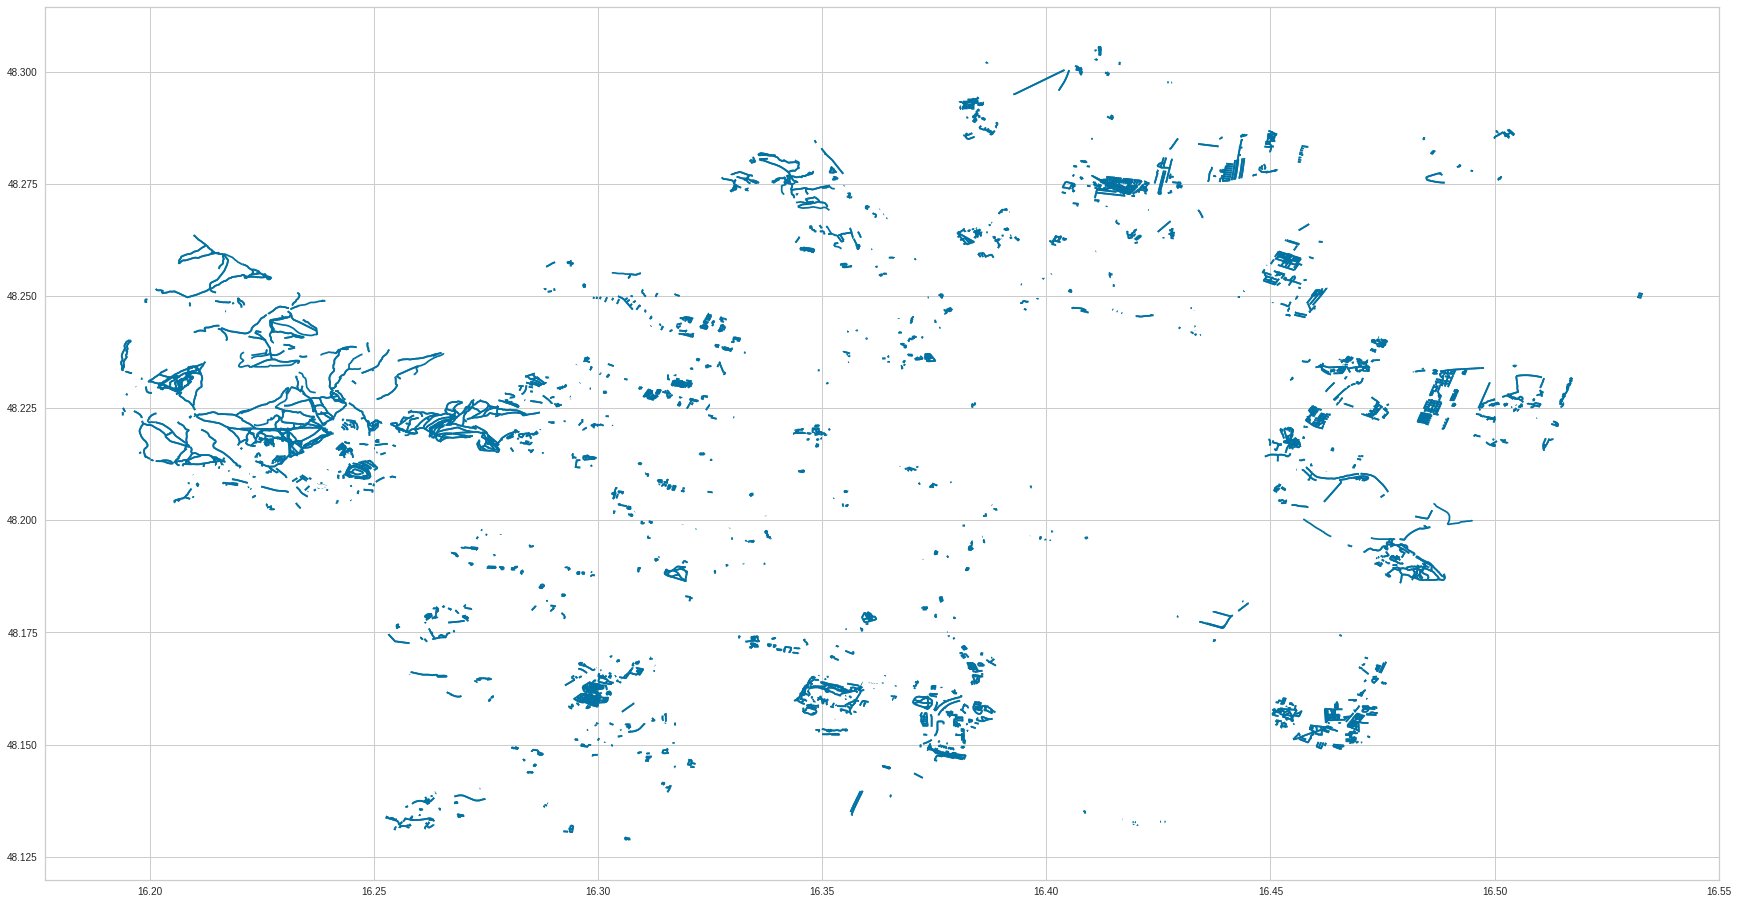

In [ ]:
#printing each cluster
data_geo[data_geo.score == 17].plot(figsize=(30,30))
plt.show()